# Name – Arindam Thakur
# Title - Diamond Price prediction
Section – K20MD
Registration number – 12017006

## Insight about Project

This projrct explores a dataset containing prices and attributes for approximately 54,000 round-cut diamonds. There are 53,940 diamonds in the dataset with 10 features (carat, cut, color, clarity, depth, table, price, x, y, and z). 
Most variables are numeric in nature, but the variables cut, color, and clarity are ordered factor variables with the following levels. About the currency for the price column: it is Price ($) And About the columns x, y, and z they are diamond measurements as ((x: length in mm, y: width in mm, z: depth in mm))




The goal of this project is to develop a machine learning model that can accurately predict the price of diamonds based on their features. 

The model should take into account factors such as carat weight, cut, color, clarity, and other relevant characteristics of the diamond.


# Importing python libraries

In [395]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")
import math

## Importing dataset

In [396]:
data=pd.read_csv("DiamondsPrices.csv")

In [397]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [398]:
# x dimension in millimetres
# y dimension in millimetres
# z dimension in millimetres

## Shape of Dataset

In [399]:
data.shape

(53940, 10)

In [400]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [401]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [402]:
data.value_counts().sum()

53940

## Statistical values of the data

In [403]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [404]:
data.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [405]:
data.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

# Data Cleaning ->

### Outlier removal of Carat column =>

<AxesSubplot:xlabel='carat'>

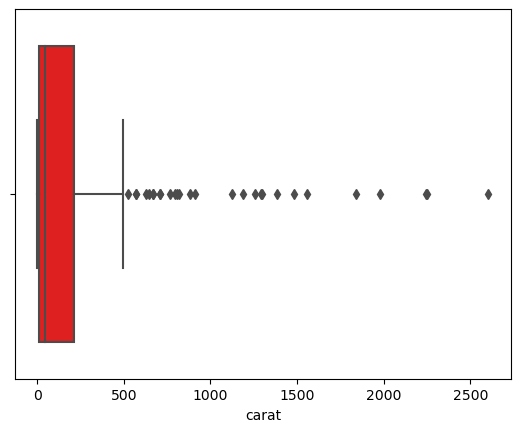

In [406]:
sns.boxplot(data.carat.value_counts(),color="red") # may have outliers values

In [407]:
data["carat"].quantile([0.95,0.96,0.97,0.98,0.99,0.999,1]) # outliers after 999 %

0.950    1.70
0.960    1.98
0.970    2.01
0.980    2.04
0.990    2.18
0.999    2.68
1.000    5.01
Name: carat, dtype: float64

In [408]:
min_thresold=data["carat"].quantile(0.999)

In [409]:
data=data[data["carat"]<min_thresold]

In [410]:
data.shape

(53885, 10)

In [411]:
data.describe()

,carat,depth,table,price,x,y,z
count,53885.000000,53885.000000,53885.000000,53885.000000,53885.000000,53885.000000,53885.000000
mean,0.795557,61.748607,57.456036,3922.178881,5.727523,5.730974,3.536544
std,0.468101,1.430643,2.233683,3975.892226,1.116468,1.137216,0.702205
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2399.000000,5.700000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5312.000000,6.540000,6.530000,4.030000
max,2.670000,79.000000,95.000000,18823.000000,9.080000,58.900000,31.800000


## *-----------------------------------*------------------------------

### Outlier removal of table column =>

<AxesSubplot:xlabel='table'>

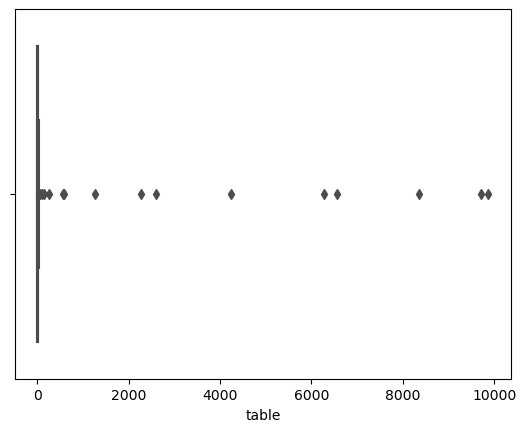

In [412]:
sns.boxplot(data.table.value_counts(),color="red")

In [413]:
data["table"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.97,0.99,0.999,1]) #outliers after 99%

0.100    55.0
0.200    56.0
0.300    56.0
0.400    57.0
0.500    57.0
0.600    58.0
0.700    58.0
0.800    59.0
0.900    60.0
0.950    61.0
0.970    62.0
0.990    64.0
0.999    67.0
1.000    95.0
Name: table, dtype: float64

In [414]:
min_thresold1=data["table"].quantile(0.999)

In [415]:
data=data[data["table"]<min_thresold1]

<AxesSubplot:xlabel='table'>

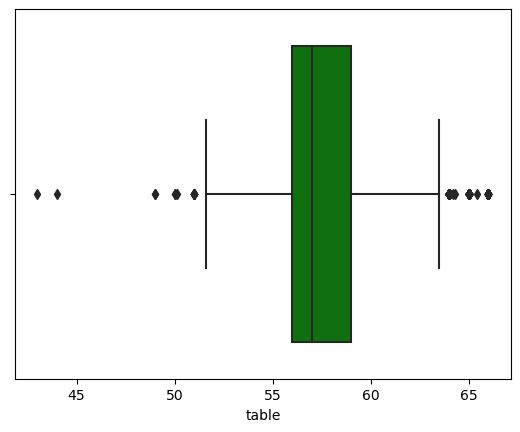

In [416]:
sns.boxplot(data.table,color="green") # no outliers

In [417]:
data["table"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.97,0.99,1]) #outliers after 99%

0.10    55.0
0.20    56.0
0.30    56.0
0.40    57.0
0.50    57.0
0.60    58.0
0.70    58.0
0.80    59.0
0.90    60.0
0.95    61.0
0.97    62.0
0.99    63.0
1.00    66.0
Name: table, dtype: float64

 #### We can find outliers after 99%

In [418]:
data.shape

(53796, 10)

In [419]:
data.describe()

,carat,depth,table,price,x,y,z
count,53796.000000,53796.000000,53796.000000,53796.000000,53796.000000,53796.000000,53796.000000
mean,0.795359,61.752825,57.437588,3921.976467,5.726795,5.730408,3.536415
std,0.468175,1.418009,2.184381,3976.770923,1.116359,1.137216,0.702295
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,948.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2398.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5312.250000,6.540000,6.530000,4.030000
max,2.670000,78.200000,66.000000,18823.000000,9.080000,58.900000,31.800000


## ----------------------------------------------------------

### outliers removal in y columns

<AxesSubplot:xlabel='y'>

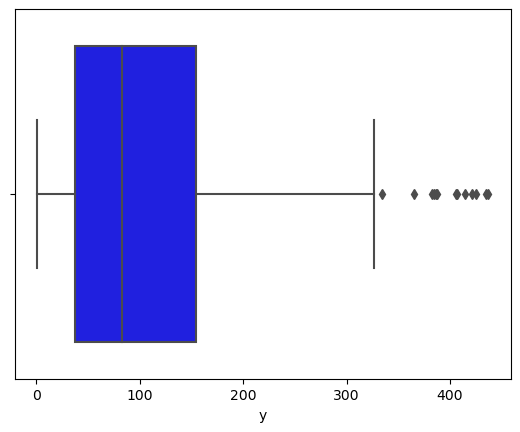

In [420]:
sns.boxplot(data.y.value_counts(),color="blue")

In [421]:
data["y"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.97,0.9999,1]) #after 99

0.1000     4.36000
0.2000     4.55000
0.3000     4.83000
0.4000     5.24000
0.5000     5.71000
0.6000     6.08000
0.7000     6.42000
0.8000     6.69000
0.9000     7.30000
0.9500     7.63000
0.9700     8.04000
0.9999     8.91482
1.0000    58.90000
Name: y, dtype: float64

In [422]:
min_thresold2=data["y"].quantile(0.9999)

In [423]:
data=data[data["y"]<min_thresold2]

<AxesSubplot:xlabel='y'>

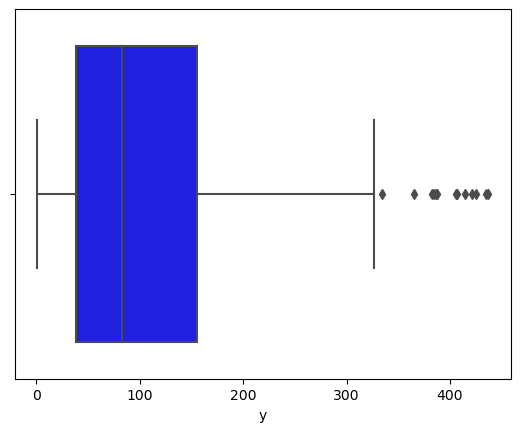

In [424]:
sns.boxplot(data.y.value_counts(),color="blue") 

In [425]:
data["y"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.97,0.999,1]) # after 99%

0.100    4.36000
0.200    4.55000
0.300    4.83000
0.400    5.24000
0.500    5.71000
0.600    6.08000
0.700    6.42000
0.800    6.69000
0.900    7.30000
0.950    7.63000
0.970    8.03330
0.999    8.68211
1.000    8.89000
Name: y, dtype: float64

In [426]:
data.shape

(53790, 10)

In [427]:
data.describe()

,carat,depth,table,price,x,y,z
count,53790.000000,53790.000000,53790.000000,53790.000000,53790.000000,53790.000000,53790.000000
mean,0.795212,61.753116,57.437414,3920.878397,5.726518,5.728695,3.536174
std,0.467927,1.417762,2.184262,3975.186766,1.116014,1.107897,0.701873
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,948.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2398.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5312.000000,6.540000,6.530000,4.030000
max,2.670000,78.200000,66.000000,18823.000000,8.900000,8.890000,31.800000


## ---------------------------------------------------

### Outlier removal in z column =>

<AxesSubplot:xlabel='z'>

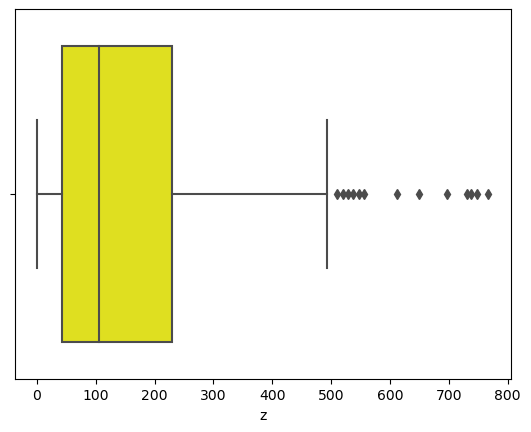

In [428]:
sns.boxplot(data.z.value_counts(),color='yellow')

In [429]:
data["z"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.97,0.9999,1]) # after 99%

0.1000     2.690000
0.2000     2.800000
0.3000     2.980000
0.4000     3.220000
0.5000     3.520000
0.6000     3.760000
0.7000     3.980000
0.8000     4.130000
0.9000     4.520000
0.9500     4.720000
0.9700     4.970000
0.9999     5.576211
1.0000    31.800000
Name: z, dtype: float64

In [430]:
min_thresold3=data.z.quantile(0.9999)
data=data[data.z<min_thresold3]

In [431]:
data["z"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.97,0.9999,1]) # after 99%

0.1000    2.69
0.2000    2.80
0.3000    2.98
0.4000    3.22
0.5000    3.52
0.6000    3.76
0.7000    3.98
0.8000    4.13
0.9000    4.52
0.9500    4.72
0.9700    4.97
0.9999    5.54
1.0000    5.57
Name: z, dtype: float64

<AxesSubplot:xlabel='z'>

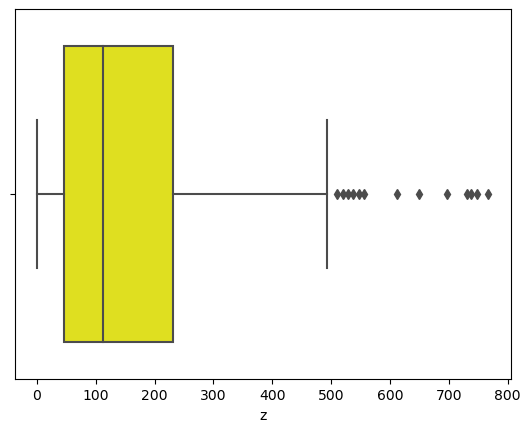

In [432]:
sns.boxplot(data.z.value_counts(),color='yellow')

In [433]:
data.shape

(53784, 10)

In [434]:
data.describe()

,carat,depth,table,price,x,y,z
count,53784.000000,53784.000000,53784.000000,53784.000000,53784.000000,53784.000000,53784.000000
mean,0.795067,61.752640,57.437506,3920.067158,5.726295,5.728476,3.535447
std,0.467690,1.416845,2.184288,3974.230114,1.115803,1.107696,0.690932
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,948.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2398.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5311.000000,6.540000,6.530000,4.030000
max,2.670000,78.200000,66.000000,18823.000000,8.900000,8.890000,5.570000


## --------------------------------------------------------------------------

# Univariate analysis

In [435]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Calarity-wise viusalisation using bar graph =>

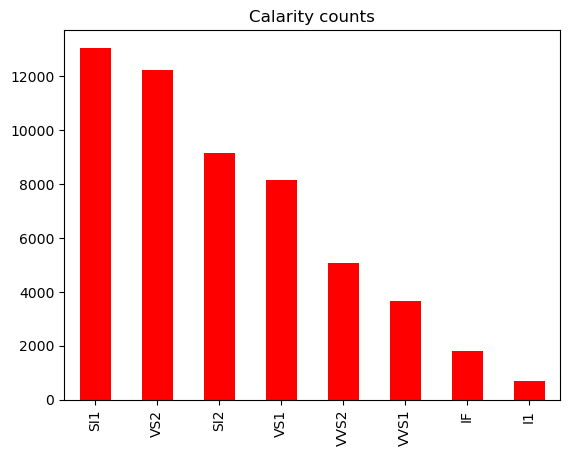

In [436]:
data.clarity.value_counts().plot.bar(color="red")
plt.title("Calarity counts")
plt.show()

### Different color counts present =>

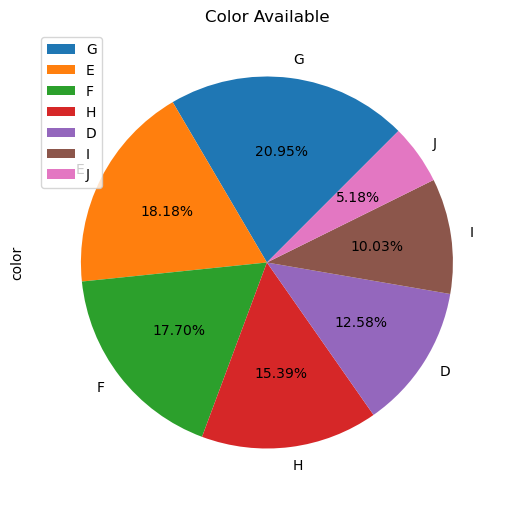

In [437]:
ax=plt.figure(figsize=[6,8])
data["color"].value_counts().plot.pie(autopct = "%.2f%%",startangle=45)
plt.title("Color Available")
plt.legend()

### Price distribution =>

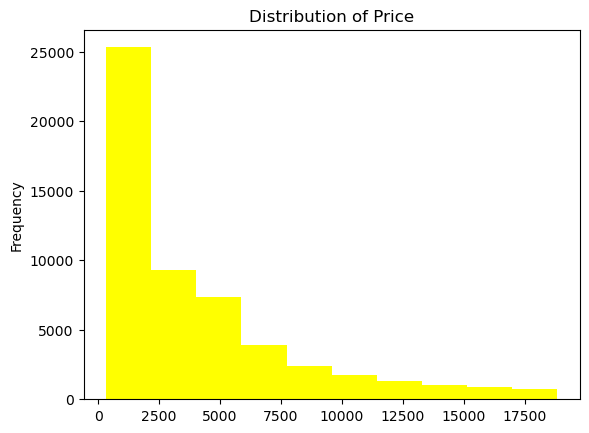

In [438]:
data.price.plot.hist(bins=10,color="yellow")
plt.title("Distribution of Price")
plt.show()

### Carat distribution or Frequency = >

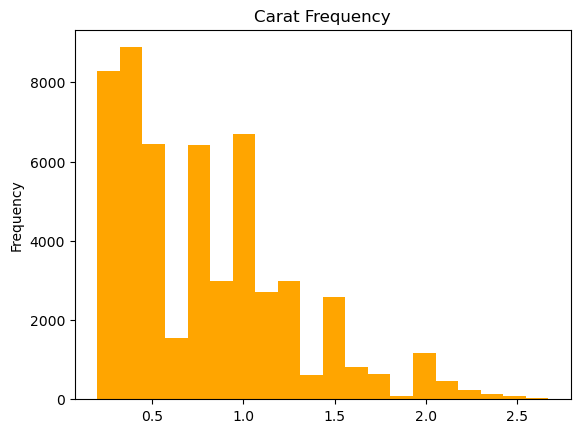

In [439]:
data.carat.plot.hist(bins=20,color="orange")
plt.title("Carat Frequency")
plt.show()

## Bivariate Analysis

### Quality-cut for average value of each carat =>

<AxesSubplot:xlabel='cut'>

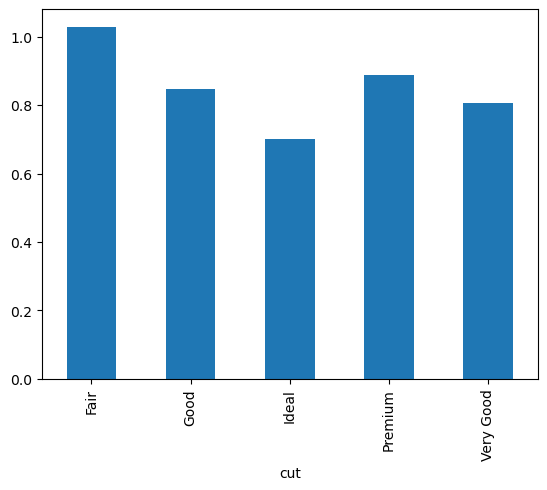

In [440]:
data.groupby('cut').mean()['carat'].plot.bar()

## Multivariate Analysis

### Relation between each column with each other using Pairplot =>

<Figure size 600x800 with 0 Axes>

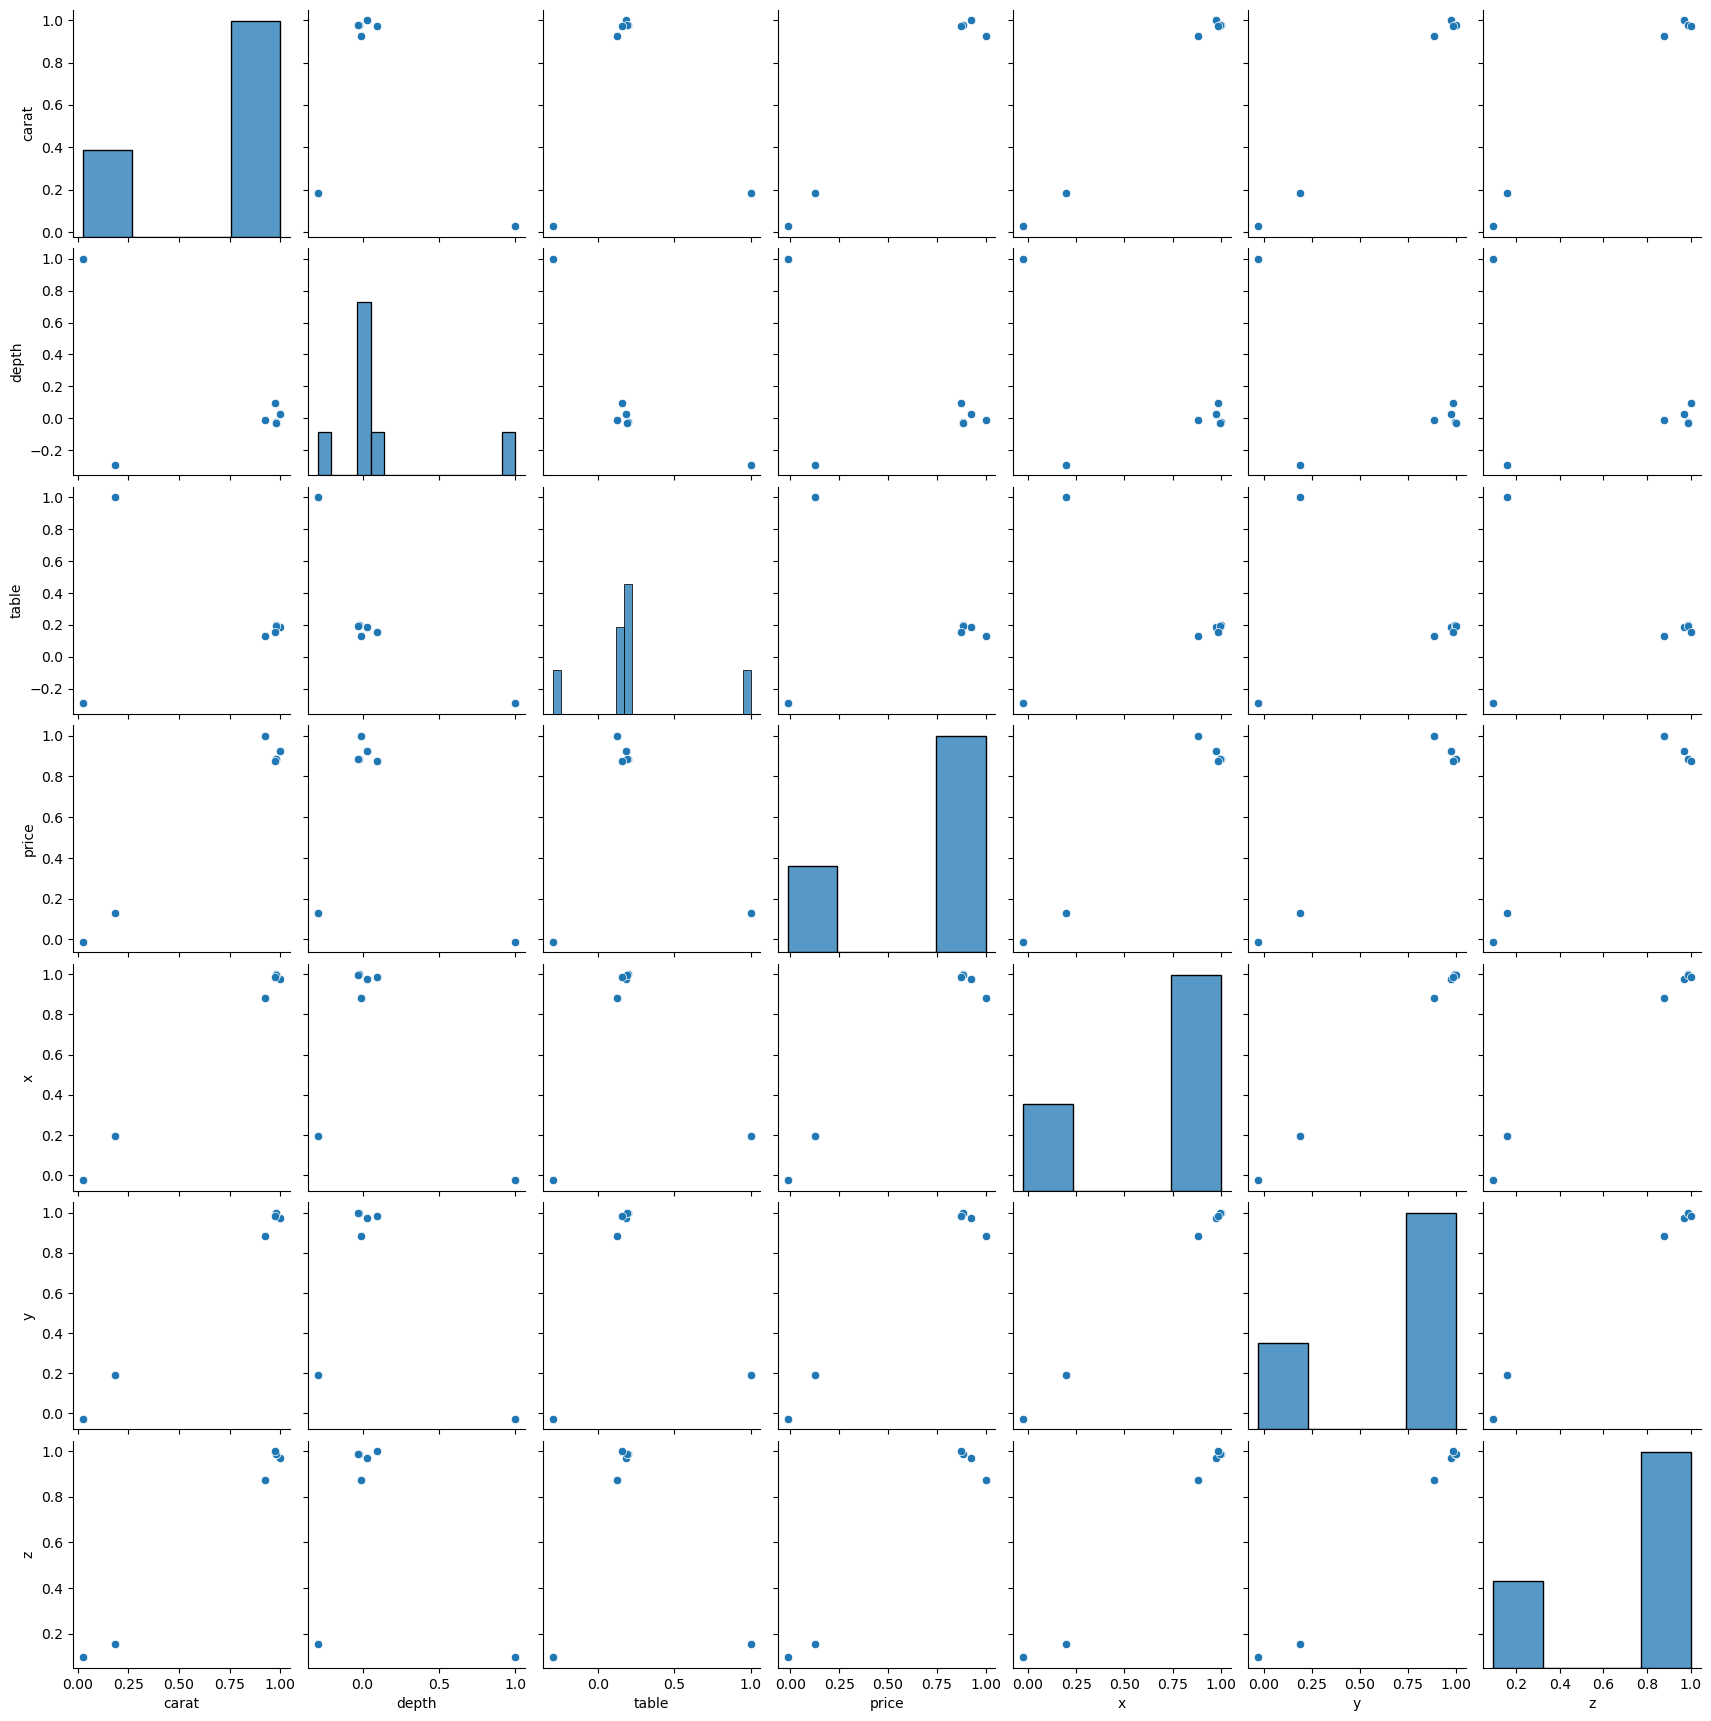

In [441]:
ax=plt.figure(figsize=[6,8])
sns.pairplot(data.corr())

### Correlation between data (Higher correlation higer the relation between two variables) =>

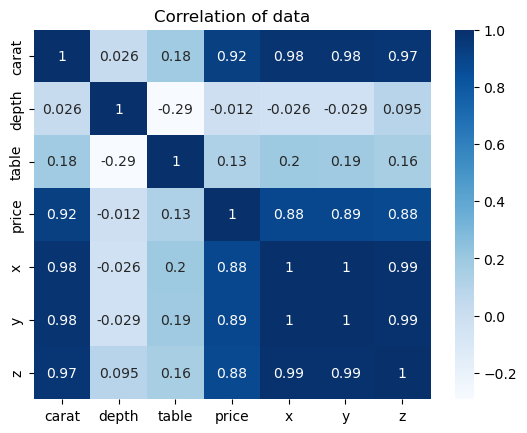

In [442]:
sns.heatmap(data = data.corr(),cmap="Blues",annot=True) 
plt.title("Correlation of data")
plt.show()

### here we can see pr1ice and carat are very much related

In [443]:
# Machine Learning  

In [444]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### WE can see the relation between carat and price which shows some linear relation =>

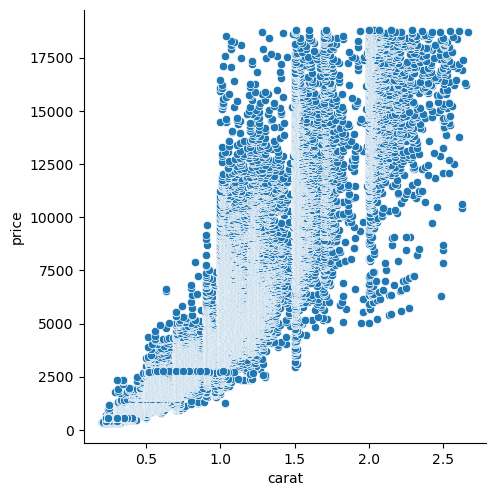

In [445]:
sns.pairplot(data,x_vars =["carat"],y_vars=["price"],kind="scatter",size=5)

In [446]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Data Preprocessing

### using label encoder for categorical data 

In [447]:
from sklearn import preprocessing

In [448]:
le=preprocessing.LabelEncoder()

### Applying LabelEncoder on cut column

In [449]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [450]:
data['cut']=le.fit_transform(data['cut'])

In [451]:
data['cut'].unique()

array([2, 3, 1, 4, 0])

### Applying LabelEncoder on color column

In [452]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [453]:
data['color']=le.fit_transform(data['color'])

In [454]:
data['color'].unique()

array([1, 5, 6, 4, 2, 3, 0])

### Applying LabelEncoder on clarity column

In [455]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [456]:
data['clarity']=le.fit_transform(data['clarity'])

In [457]:
data['clarity'].unique()

array([3, 2, 4, 5, 7, 6, 0, 1])

In [458]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


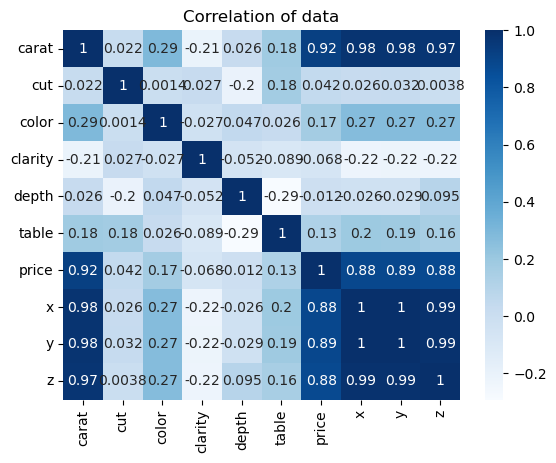

In [459]:
sns.heatmap(data = data.corr(),cmap="Blues",annot=True) 
plt.title("Correlation of data")
plt.show()

<Figure size 600x800 with 0 Axes>

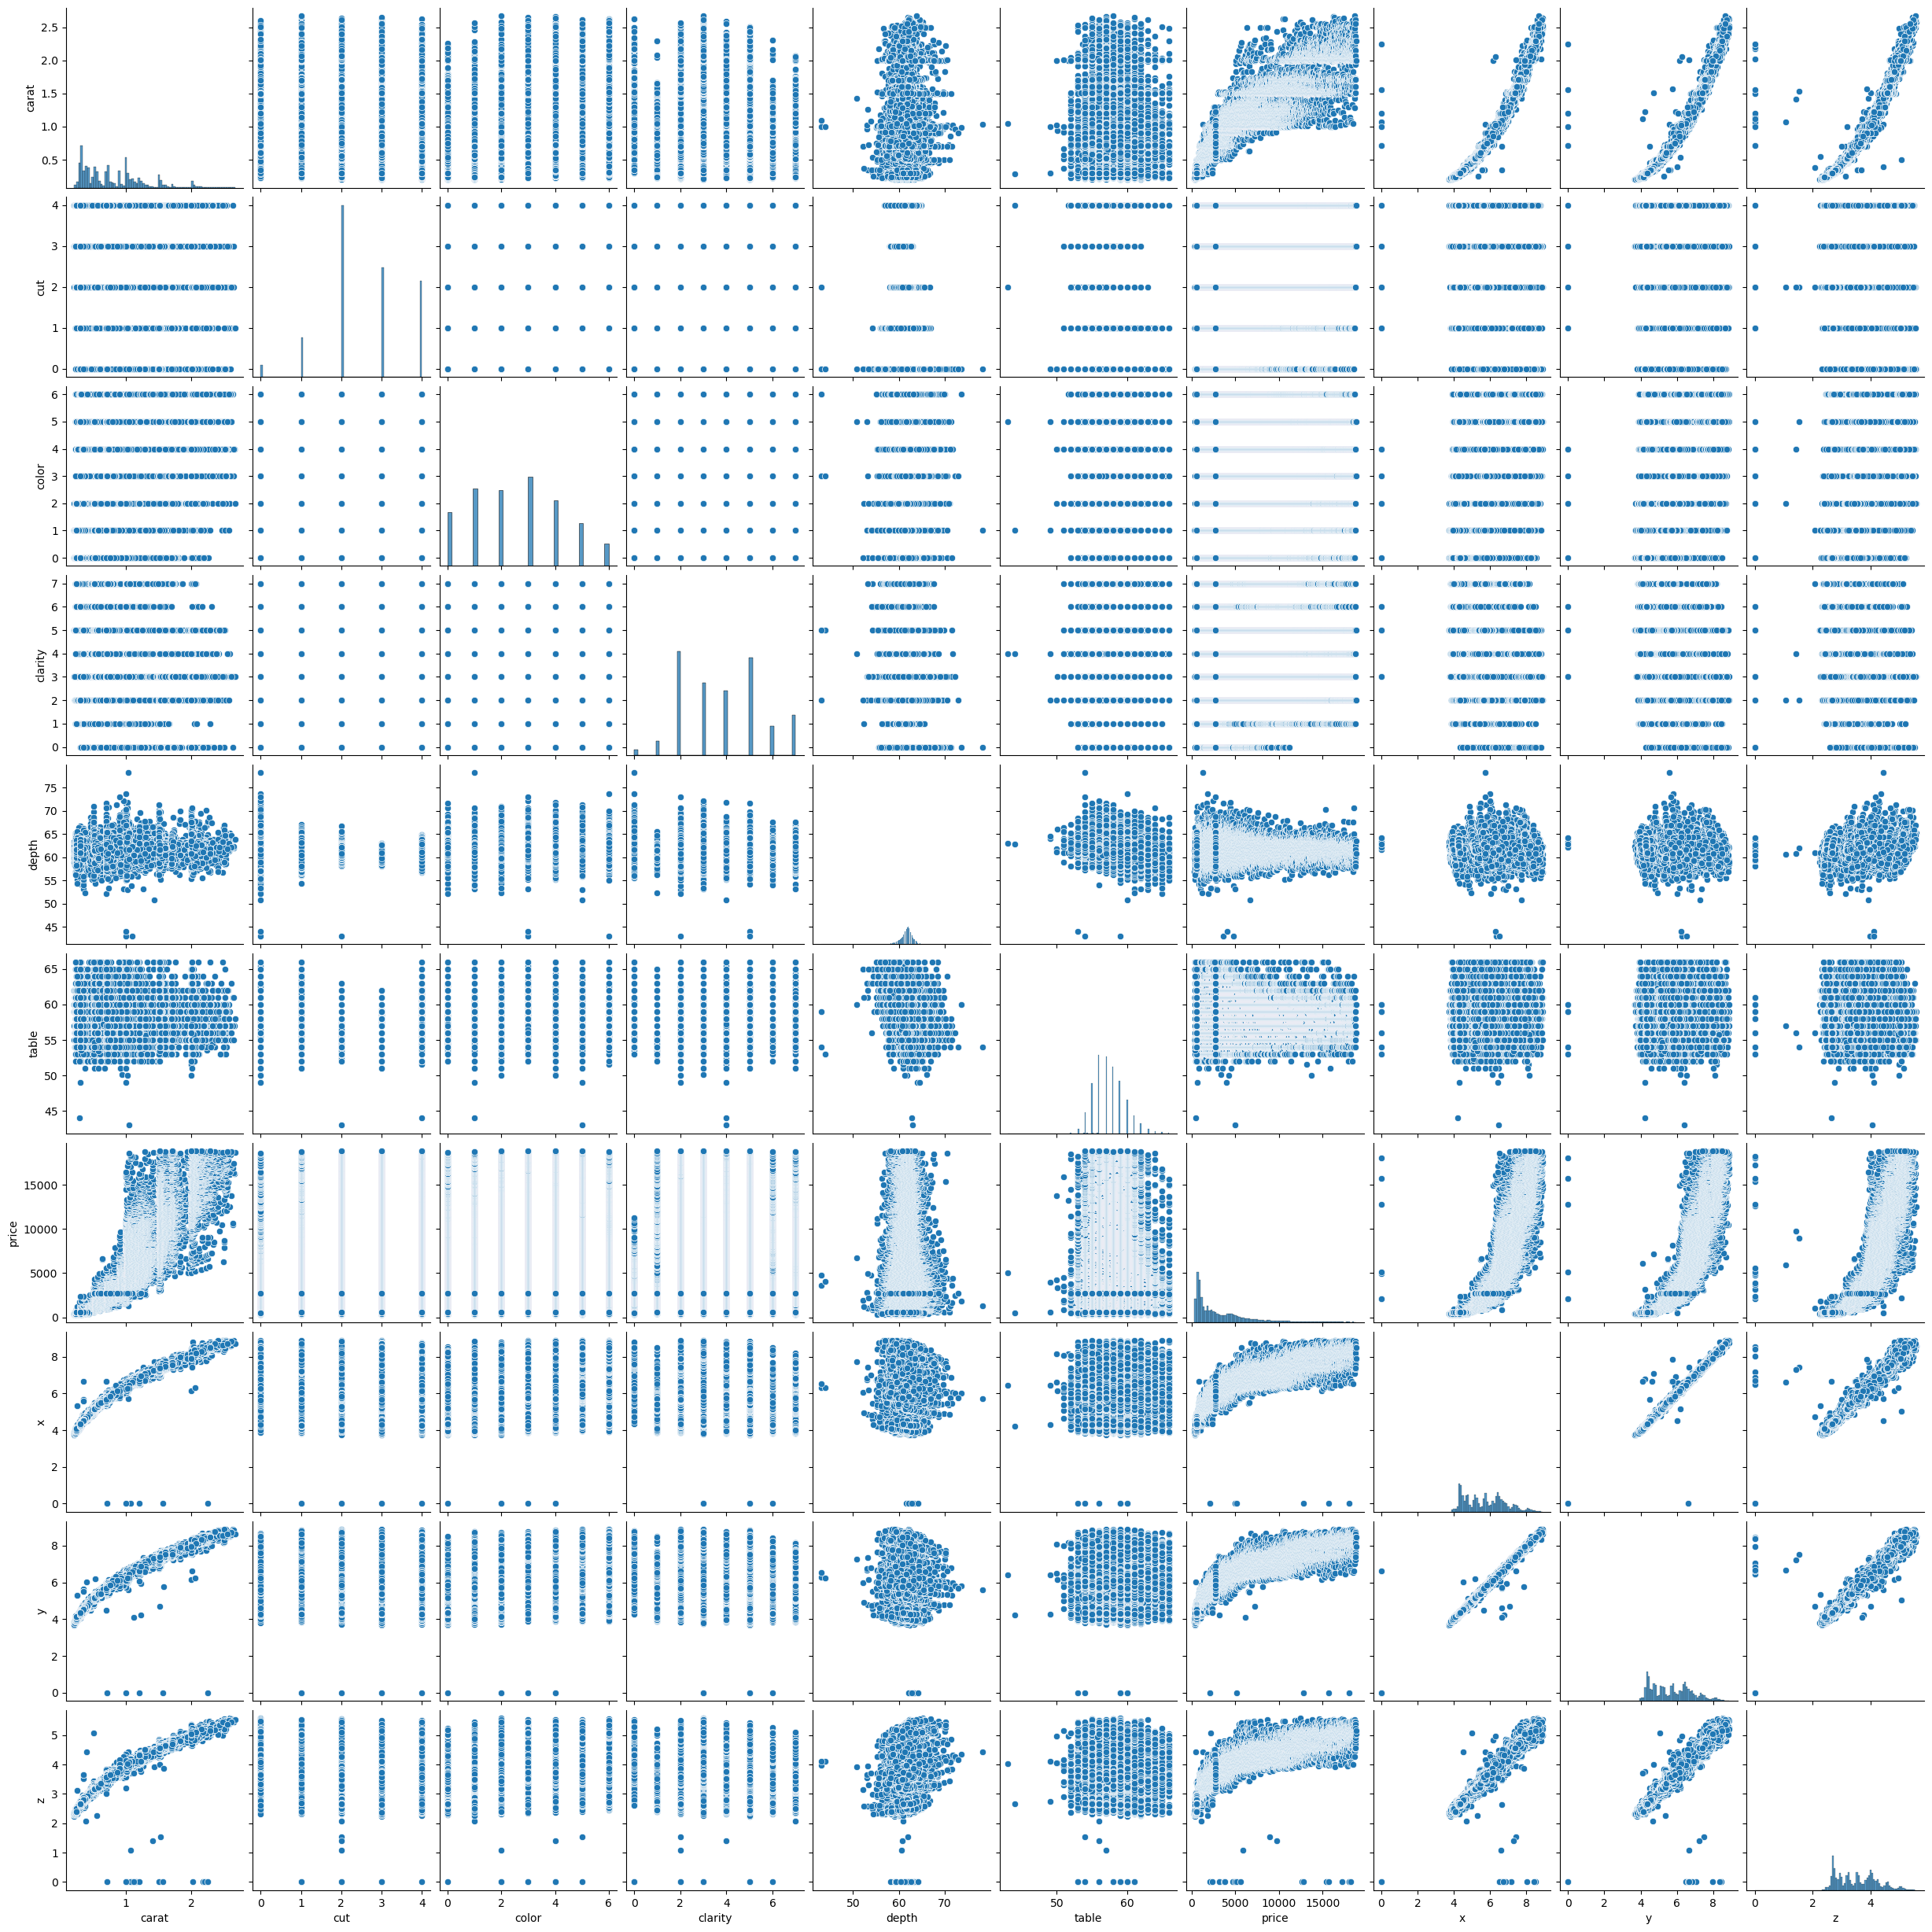

In [473]:
ax=plt.figure(figsize=[6,8])
sns.pairplot(data)

# Train Test Split

In [461]:
x=data.drop('price',axis=1)

In [462]:
y=data['price']

In [463]:
from sklearn.model_selection import train_test_split

In [464]:
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.2)

# Model Training = >

## Using Linear regressoin 

In [465]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_tr,y_tr)
pred=linreg.predict(x_ts)

In [466]:
#Accuracy Score
from sklearn.metrics import r2_score
lr=r2_score(y_ts,pred)*100
print(lr)

89.61806918345904


# Decision Tree Algorithm

In [467]:
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor()
reg.fit(x_tr,y_tr)
pred1=reg.predict(x_ts)

In [468]:
# Accuracy score 
from sklearn.metrics import r2_score
dtr=r2_score(y_ts,pred1)*100
print(dtr)

96.36202357531366


# RandoForest Regressor Algo

In [469]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_tr,y_tr)
pred2=rfr.predict(x_ts)

In [470]:
# Accuracy score 
from sklearn.metrics import r2_score
rfr=r2_score(y_ts,pred2)*100
print(rfr)

98.13541954329213


# Knearest Neighbor Algorithm

In [471]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_tr,y_tr)
pred3=knn.predict(x_ts)

In [472]:
# Accuracy score 
from sklearn.metrics import r2_score
knn=r2_score(y_ts,pred3)*100
print(knn)

94.94042887529221
